In [2]:
import numpy as np
import os
import copy
import warnings

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette(sns.diverging_palette(220, 20, n=6))

# Load data from local files or from hard drive?# 

In [3]:
localData = False

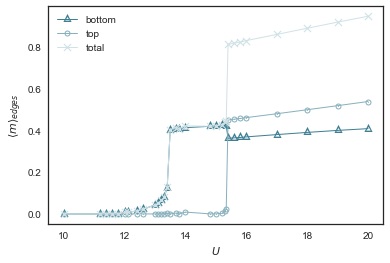

In [21]:
nOrb = 3

Nx = 512
Ny = 16
beta = 100

initCond = 1

Us = [10, 11.2, 11.4, 11.6, 11.8, 12, 12.1, 12.4, 12.6, 13, 13.1, 13.2, 13.3, 13.4, 13.5, 13.7, 13.8,\
      14, 14.8, 15, 15.2, 15.3, 15.34, 15.4, 15.6, 15.8, 16, 17, 18, 19, 20]
    
#Us = [10, 12, 13, 13.1, 13.2, 13.3, 13.4, 13.5,\
#      14, 14.8, 15, 15.2, 15.22, 15.24, 15.26, 15.28, 15.32, 15.34,\
#      15.38]    

#
#
#Us = [10, 14.8, 15, 15.2, 15.4, 15.6, 15.8, 16, 17, 18, 19, 20]

msBottom = np.zeros(len(Us))
msTop = np.zeros(len(Us))

for mId, U in enumerate(Us):
    if localData == False:

        ## LOAD FILES FROM HARD DRIVE (THEY ARE TOO BIG!). SET PATH BELOW.

        ADATA = "ADATA HD710"
        Flash = "Francisco's Flash Drive"

        SAVEDIR = "../../../../../../../Volumes/" + ADATA + "/MScData/MeanFieldTMDnanoribbon/"
        #SAVEDIR = "../../../../../../../Volumes/" + Flash + "/MScData/MeanFieldTMDnanoribbon/"

        LOADSUBDIR = SAVEDIR + "Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta) + "/"
        
    else:
        SAVEDIR = "../plots/MeanFieldTMDnanoribbon/"
        LOADSUBDIR = SAVEDIR + "Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta) + "/"
            
        
            
    nUp = np.loadtxt(LOADSUBDIR + "nUp.txt")
    nDown = np.loadtxt(LOADSUBDIR + "nDown.txt")
            
    msBottom[mId] = nUp[0] - nDown[0] + nUp[1] - nDown[1] + nUp[2] - nDown[2]
    msTop[mId] = nUp[-1] - nDown[-1] + nUp[-2] - nDown[-2] + nUp[-3] - nDown[-3]

SAVESUBDIR = "../plots/MeanFieldTMDnanoribbon/" 
if not os.path.exists(SAVESUBDIR):
    os.makedirs(SAVESUBDIR)   

    
plt.plot(Us, msBottom, linewidth = 1, marker = '^',\
         markeredgewidth = 5, markersize = 0.0001, label = 'bottom')
plt.plot(Us, msTop, linewidth = 1, marker = 'o',\
         markeredgewidth = 5, markersize = 1, label = 'top')
plt.plot(Us, abs(msTop + msBottom), linewidth = 1, marker = 'x',\
         markeredgewidth = 10, markersize = 0.8, label = 'total')
plt.xlabel(r'$U$')
plt.ylabel(r'$\left\langle m \right\rangle_{edges}$')
plt.legend()
plt.savefig(SAVESUBDIR + "edge-mag" + "Nx=" + str(Nx) +\
            "_Ny=" + str(Ny) + "_U=" + str(U) + "_beta=" + str(beta) + ".png", dpi = 600)